# 1. Introduction

It’s important to understand prediction errors (bias and variance) wh. There is a tradeoff between a model’s ability to minimize bias and variance. Gaining a proper understanding of these errors would help us not only to build accurate models but also to avoid the mistake of overfitting and underfitting. If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it's going to have high variance and low bias.


You can find this notebook on this [link](https://colab.research.google.com/drive/188aN4MYDokbppYTAhywQ2EGVDyCgXo67?usp=sharing)

the textual information for bias and variance is taken from [here](https://www.kaggle.com/code/azminetoushikwasi/mastering-bias-variance-tradeoff/notebook#11.1.-Calculate-Bias)



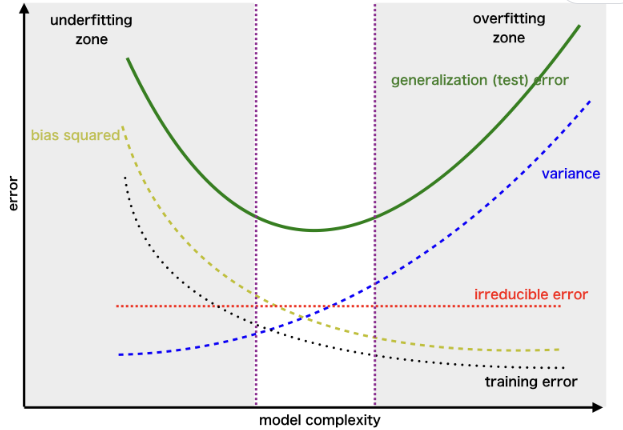

# 2. Understanding Bias
### What is **Bias**?
> Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. - *Seema Singh*

### Bias Definition in Statistics
In statistics, bias is a term which defines the tendency of the measurement process. It means that it evaluates the over or underestimation of the value of the population parameter. Let us consider an example, in case you have the rule to evaluate the mean of the population. Hopefully, you might have found an estimation using the rule, which is the true reflection of the population. Now, by using the biased estimator, it is easy to find the difference between the true value and the statistically expected value of the population parameter.

### Why it is so important in Data Science?
Due to society's culture and history, historical data might be discriminatory against certain minority groups. Cognitive biases are systematic errors in thinking, usually inherited by cultural and personal experiences, that lead to distortions of perceptions when making decisions. And while data might seem objective, data is collected and analyzed by humans, and thus can be biased. Because of this, it's highly important to check assumptions over the data to avoid future algorithmic bias.

##### Sometimes it can be helpful too!
***The idea of having bias was about model giving importance to some of the features in order to generalize better for the larger dataset with various other attributes. Bias in ML does help us generalize better and make our model less sensitive to some single data point.***

*Information : Wikipedia, bmc.com, Investopedia, towardsdatascience.com*



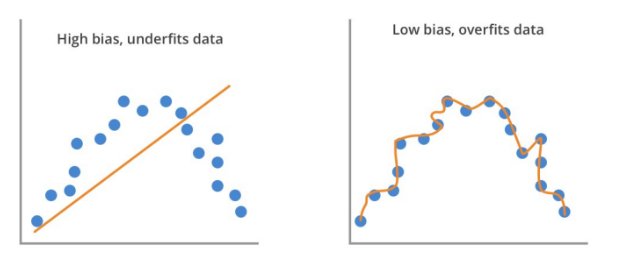

# 3. Understanding Variance
### What is "Variance"

Variance is a measurement of the spread between numbers in a data set. In probability theory and statistics, variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.


### Variance in terms of DS-ML
> Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data. - *Seema Singh*

Also, variance refers to the changes in the model when using different portions of the training data set. Simply stated, variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set.


## Measuring Variance
In statistics, variance measures variability from the average or mean. It is calculated by taking the differences between each number in the data set and the mean, then squaring the differences to make them positive, and finally dividing the sum of the squares by the number of values in the data set. [Learn More](https://en.wikipedia.org/wiki/Variance)

Bias and variance are used in supervised machine learning, in which an algorithm learns from training data or a sample data set of known quantities. The correct balance of bias and variance is vital to building machine-learning algorithms that create accurate results from their models.
*Information : Wikipedia, bmc.com, Investopedia, towardsdatascience.com*




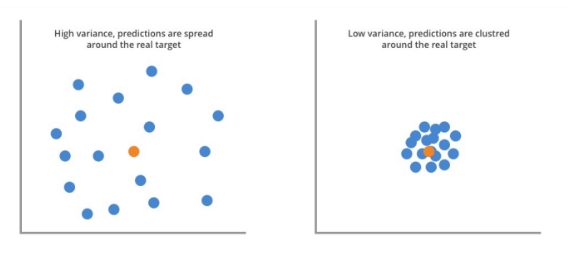

# 6. Bias and variance using bulls-eye diagram

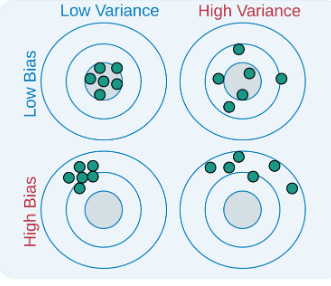

In the above diagram, center of the target is a model that perfectly predicts correct values. As we move away from the bulls-eye our predictions become get worse and worse. We can repeat our process of model building to get separate hits on the target.

### underfitting
**In supervised learning, underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. Also, these kind of models are very simple to capture the complex patterns in data like Linear and logistic regression.**

### overfitting
**In supervised learning, overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are very complex like Decision trees which are prone to overfitting.**

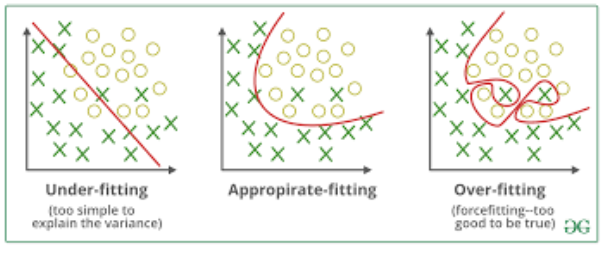![download

*credit - GeekforGeeks*


## Why Bias Variance Tradeoff?

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.


# Step 1: Imports and Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")
np.random.seed(42)


# Step 2: Generate Data (Ground Truth is Quadratic)

In [ ]:
def true_function(x):
    return np.sin(1.5*x)

X = np.sort(np.random.rand(100) * 5)
y = true_function(X) + np.random.randn(100) * 0.3  # Add noise

X = X.reshape(-1, 1)

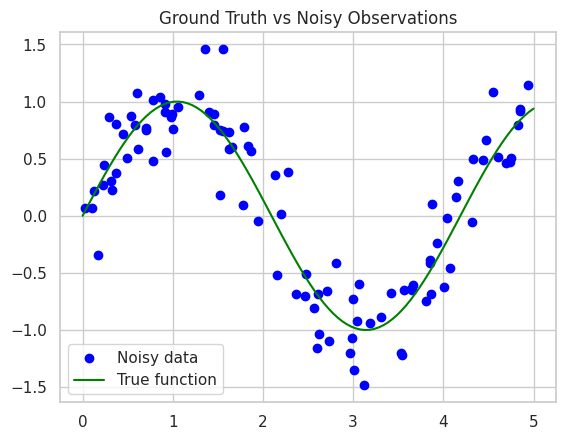

In [ ]:
plt.scatter(X, y, color="blue", label="Noisy data")
x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
plt.plot(x_plot, true_function(x_plot), color="green", label="True function")
plt.title("Ground Truth vs Noisy Observations")
plt.legend()
plt.show()


# Step 3: Fit Different Degree Polynomial Models

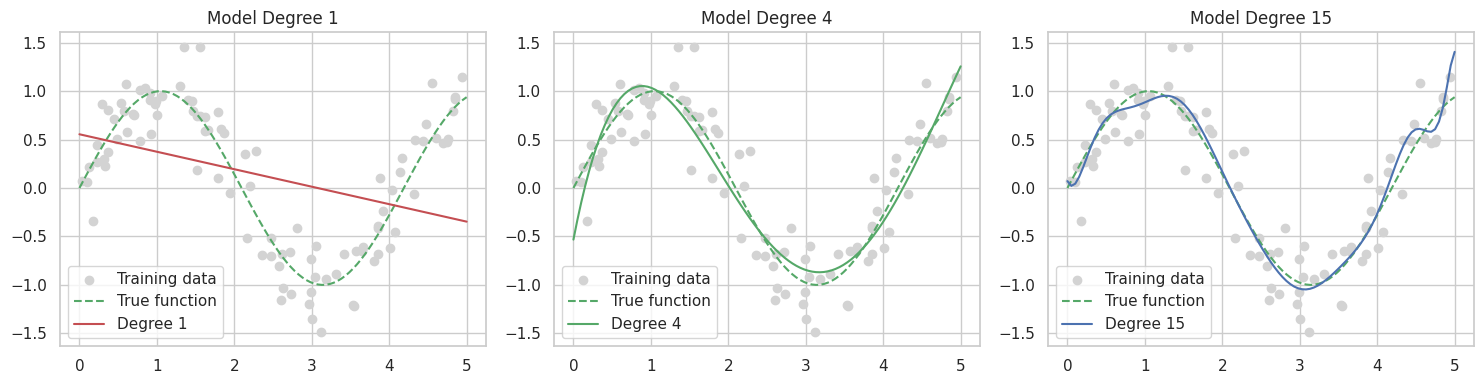

In [ ]:
degrees = [1, 4, 15]
colors = ["r", "g", "b"]

plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X, y)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color="lightgray", label="Training data")
    plt.plot(x_plot, true_function(x_plot), "g--", label="True function")
    plt.plot(x_plot, model.predict(x_plot), color=colors[i], label=f"Degree {d}")
    plt.title(f"Model Degree {d}")
    plt.legend()

plt.tight_layout()
plt.show()


Degree 1: High bias

Degree 4: Just right

Degree 15: High variance

# Step 4: Plot Training vs Test Error

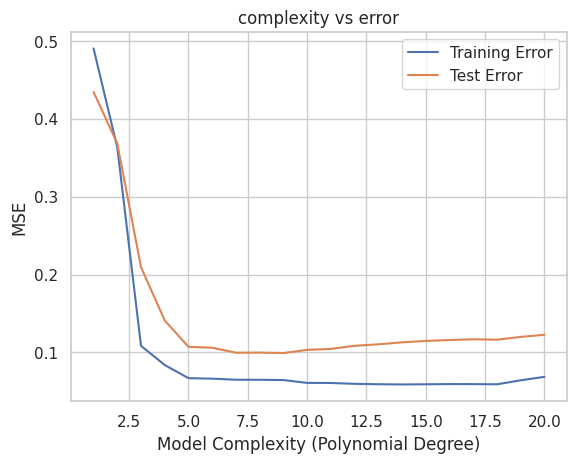

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_errors = []
test_errors = []
degrees = range(1, 21)

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("MSE")
plt.title("complexity vs error")
plt.legend()
plt.show()


In [ ]:
from ipywidgets import interact

@interact(degree=(1, 20))
def interactive_model(degree=1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(x_plot)

    plt.figure(figsize=(8, 4))
    plt.scatter(X, y, color="lightgray")
    plt.plot(x_plot, true_function(x_plot), "g--", label="True function")
    plt.plot(x_plot, y_pred, "r-", label=f"Degree {degree}")
    plt.title(f"Interactive Polynomial Model (Degree={degree})")
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Output()), _dom_classes=('widge…

In [ ]:
def get_bias(predicted_values, true_values):
    return np.round(np.mean((predicted_values - true_values) ** 2), 4)

def get_variance(values):
    return np.round(np.var(values), 4)

def get_metrics(target_train, target_test, model_train_predictions, model_test_predictions):
    training_mse = mean_squared_error(target_train, model_train_predictions)
    test_mse = mean_squared_error(target_test, model_test_predictions)
    bias = get_bias(model_test_predictions, target_test)
    variance = get_variance(model_test_predictions)

    return [training_mse, test_mse, bias, variance]


In [ ]:
degrees = range(1, 16)
metrics = {
    'degree': [],
    'train_mse': [],
    'test_mse': [],
    'bias': [],
    'variance': []
}

for d in degrees:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_mse, test_mse, bias, variance = get_metrics(y_train, y_test, pred_train, pred_test)

    metrics['degree'].append(d)
    metrics['train_mse'].append(train_mse)
    metrics['test_mse'].append(test_mse)
    metrics['bias'].append(bias)
    metrics['variance'].append(variance)


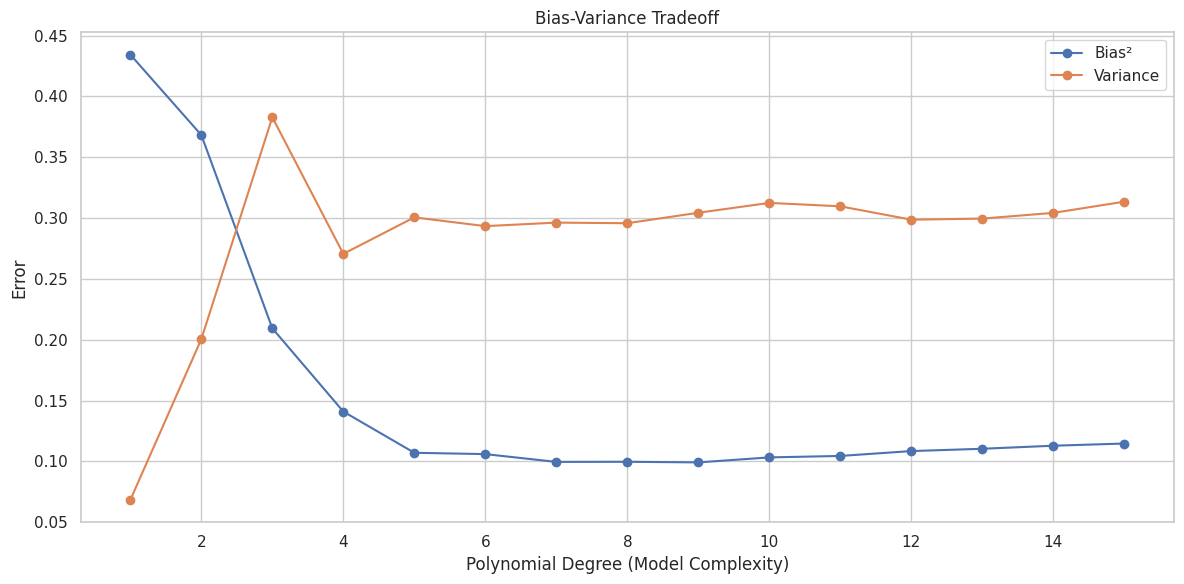

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(metrics['degree'], metrics['bias'], label="Bias²", marker='o')
plt.plot(metrics['degree'], metrics['variance'], label="Variance", marker='o')

plt.xlabel("Polynomial Degree (Model Complexity)")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## interpreting the bias-variance plot

🟦 Bias²
* Starts high at degree 1 (linear → poor approximation of sine)

* Drops sharply at degree 2 or 3 (captures curvature well)

* Stays low for all higher degrees → because polynomials can easily approximate sine on a short range

✅ Interpretation:

Your model is able to approximate the function very well across degrees >2.

Hence, bias stays low — the model is expressive enough.

🟧 Variance
* Low for degree 1–2 → predictions don’t change much across samples

* Rises sharply from degree 3 → model starts overfitting noise

* Keeps increasing or fluctuates at high values (degree ≥10) → unstable fits, high sensitivity to input

✅ Interpretation:

As model complexity increases, variance increases due to overfitting the training data.

This is typical: flexible models fit noise and differ a lot run-to-run.

"Even a simple model like a degree-2 polynomial can approximate a function well if the function is smooth and the domain is limited."

# VC Dimensions

## VC Dimension and VC Lines

- The **VC dimension** of a model is the largest number of points it can "shatter."
- To **shatter** a set of points means: the model can correctly classify **every possible labeling** of those points.
- For example:
  - A straight line in 2D has VC dimension **3**
  - It can shatter any arrangement of **3 points**
  - It cannot shatter **some** arrangements of 4 points (e.g., XOR-type configuration)

This gives a formal way to understand model **capacity** and **overfitting risk**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create 10 2D points and labels
np.random.seed(42)

class1 = np.random.rand(5, 2) * 2   # spread around [0, 2]
class2 = np.random.rand(5, 2) * 2 + 2  # spread around [2, 4]

X = np.vstack((class1, class2))
# y = np.array([0]*5+[1]*5)
y = np.array([0]*4 + [1]*1+[0]*1 + [1]*4)

# Train a linear classifier (Logistic Regression)
clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

0.9


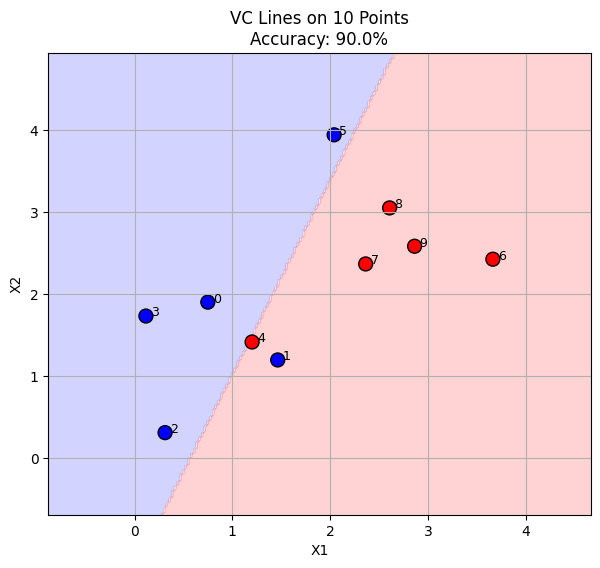

In [ ]:
def plot_decision_boundary(X, y, model, title="VC Lines on 10 Points"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
    for i in range(len(X)):
        plt.text(X[i, 0] + 0.05, X[i, 1], f"{i}", fontsize=9)

    plt.title(f"{title}\nAccuracy: {acc*100:.1f}%")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, clf)


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def generate_data(n_samples=200, n_features=2, seed=42):
    """
    Generate binary classification data with linear separability.
    """
    np.random.seed(seed)
    X = np.random.randn(n_samples, n_features)
    true_weights = np.random.randn(n_features)
    logits = X @ true_weights
    y = (logits > 0).astype(int)
    return train_test_split(X, y, test_size=0.3, random_state=seed)


In [ ]:
dimensions = [2, 3, 6, 10, 20, 50, 100]
train_accs = []
test_accs = []
generalization_gaps = []

for d in dimensions:
    X_train, X_test, y_train, y_test = generate_data(n_samples=200, n_features=d, seed=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    gap = train_acc - test_acc

    train_accs.append(train_acc)
    test_accs.append(test_acc)
    generalization_gaps.append(gap)

    print(f"Dim {d:>3}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}, Gap = {gap:.3f}")


Dim   2: Train Acc = 0.986, Test Acc = 0.967, Gap = 0.019
Dim   3: Train Acc = 1.000, Test Acc = 1.000, Gap = 0.000
Dim   6: Train Acc = 0.979, Test Acc = 0.983, Gap = -0.005
Dim  10: Train Acc = 0.993, Test Acc = 0.967, Gap = 0.026
Dim  20: Train Acc = 0.979, Test Acc = 0.933, Gap = 0.045
Dim  50: Train Acc = 1.000, Test Acc = 0.817, Gap = 0.183
Dim 100: Train Acc = 1.000, Test Acc = 0.700, Gap = 0.300


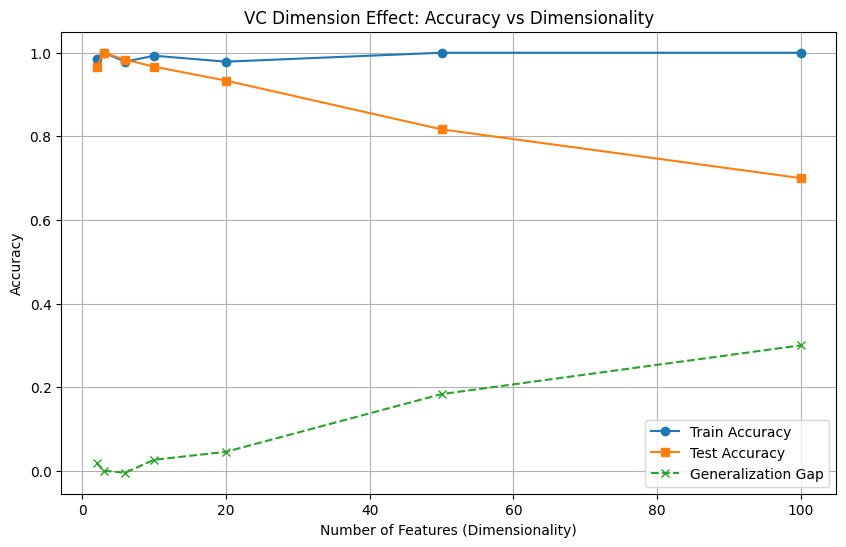

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dimensions, train_accs, label='Train Accuracy', marker='o')
plt.plot(dimensions, test_accs, label='Test Accuracy', marker='s')
plt.plot(dimensions, generalization_gaps, label='Generalization Gap', linestyle='--', marker='x')
plt.xlabel('Number of Features (Dimensionality)')
plt.ylabel('Accuracy')
plt.title('VC Dimension Effect: Accuracy vs Dimensionality')
plt.legend()
plt.grid(True)
plt.show()
